# Fraud Detection ML Project
Objective: Develop a machine learning model to predict fraudulent financial transactions and derive actionable business insights.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
file_path="/content/drive/MyDrive/FraudProject/Fraud.csv"
df=pd.read_csv(file_path)
print(df.shape)
df.head()


(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.to_parquet("/content/drive/MyDrive/FraudProject/fraud.parquet")

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [5]:
df['isFraud'].value_counts()


,count
isFraud,
0,6354407
1,8213


In [6]:
df['isFraud'].value_counts(normalize=True)*100

,proportion
isFraud,
0,99.870918
1,0.129082


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
corr=df.corr(numeric_only=True)
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [9]:
df.columns


Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df=df.drop(columns=['nameOrig','nameDest'],errors='ignore')
df['balanceOrig_diff']=df['oldbalanceOrg']-df['newbalanceOrig']
df['balanceDest_diff']=df['newbalanceDest']-df['oldbalanceDest']

df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrig_diff,balanceDest_diff
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,-21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0


In [11]:
df=pd.get_dummies(df,columns=['type'],drop_first=True)
df=df.astype({col: 'int' for col in df.select_dtypes('bool').columns})

df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrig_diff,balanceDest_diff,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,9839.64,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1864.28,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,181.00,0.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,181.00,-21182.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,11668.14,0.0,0,0,1,0


## Q1: Data Cleaning
The dataset was first inspected for missing values using descriptive statistics and null checks,no missing values were found,so no imputation was required.Outliers were analyzed through statistical summaries,particularly transaction amounts and balance variables. These were retained because extreme financial transactions often indicate fraudulent activity rather than data errors. Multicollinearity was examined using correlation analysis,which revealed strong correlations between pre- and post-transaction balance variables.Instead of dropping them arbitrarily,balance difference features were engineered to capture transaction impact while reducing redundancy.


#Q3: Variable Selection Process
Variables were selected based on domain relevance,statistical correlation,and predictive potential.Identifier columns such as customer account IDs were removed because they do not generalize patterns.Transaction type was encoded using one-hot encoding. Additional engineered features such as balance differences were introduced to better represent transaction behavior.Features with meaningful financial interpretation were prioritized.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=df.drop('isFraud',axis=1)
y=df['isFraud']
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42,stratify=y
)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
model=LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
y_prob=model.predict_proba(X_test_scaled)[:,1]
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nROC-AUC Score:",roc_auc_score(y_test,y_prob))


Confusion Matrix:
 [[1209783   61098]
 [     32    1611]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270881
           1       0.03      0.98      0.05      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.97      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524


ROC-AUC Score: 0.9949073600288427


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=100,
    n_jobs=-1
)

rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)
y_prob_rf=rf_model.predict_proba(X_test)[:,1]
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_rf))
print("\nClassification Report:\n",classification_report(y_test,y_pred_rf))
print("\nROC-AUC Score:",roc_auc_score(y_test,y_prob_rf))

Confusion Matrix:
 [[1270846      35]
 [    310    1333]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.81      0.89      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.91      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC-AUC Score: 0.9962813138224318


#Q4: Model Performance Demonstration
Performance was evaluated using confusion matrix,precision,recall, F1-score,and ROC-AUC score rather than accuracy alone due to class imbalance.Logistic Regression achieved high recall but low precision, indicating many false positives. Random Forest significantly improved precision ~97% while maintaining strong recall ~81%,with ROC-AUC around 0.996,indicating excellent fraud discrimination capability.

# Q2: Description of Fraud Detection Model
Two models were developed.Logistic Regression was used as a baseline due to its interpretability and efficiency.Also a Random Forest classifier was implemented because it handles nonlinear relationships,outliers,and class imbalance more effectively.Random Forest aggregates multiple decision trees to improve prediction robustness and reduce overfitting.Class imbalance was addressed using balanced class weights, and performance was evaluated using appropriate classification metrics.

In [21]:
import pandas as pd
feature_importance=pd.DataFrame({
    'Feature':X_train.columns,
    'Importance':rf_model.feature_importances_
}).sort_values(by='Importance',ascending=False)
feature_importance.head(10)

,Feature,Importance
7,balanceOrig_diff,0.313224
2,oldbalanceOrg,0.169035
1,amount,0.119918
3,newbalanceOrig,0.096547
8,balanceDest_diff,0.076943
12,type_TRANSFER,0.063228
0,step,0.042537
11,type_PAYMENT,0.038043
5,newbalanceDest,0.031563
9,type_CASH_OUT,0.024972


##Q5: Key Factors Predicting Fraudulent Transactions
Feature importance analysis revealed that balance changes in the originating account,transaction amount, transaction type(especially transfer and cash-out),and account balances were the strongest predictors.These variables reflect abnormal fund movement patterns commonly associated with fraudulent transactions.

#Q6: Do These Factors Make Sense?
Yes,these predictors align with real financial fraud behavior. Fraudsters typically transfer large sums quickly and withdraw funds, causing sudden balance changes.Transaction type and amount logically correspond to suspicious activity patterns,confirming that the model’s findings are consistent with domain expectations.

##Q7: Fraud Prevention Measures for Infrastructure Updates
Recommended preventive actions include deploying real-time fraud detection models,implementing transaction threshold alerts,using multi-factor authentication for high-risk transactions,applying behavioral analytics to detect unusual patterns,and continuously retraining models with new data.These measures help proactively identify and prevent fraudulent activity.

##Q8: Measuring Effectiveness of Implemented Actions
Effectiveness can be evaluated through fraud detection rate,false positive rate,reduction in financial losses,ongoing monitoring of model performance metrics(precision,recall,ROC-AUC),and customer feedback analysis.Comparing performance before and after implementation ensures continuous improvement and operational reliability.

## Conclusion
The Random Forest model demonstrated strong fraud detection capability with high precision and good recall. Feature importance analysis confirmed that transaction amount, balance differences, and transaction type are key fraud indicators. These insights can help financial institutions implement proactive fraud monitoring systems.


##(Extra)Visualization of Importance:

<Axes: xlabel='Feature'>

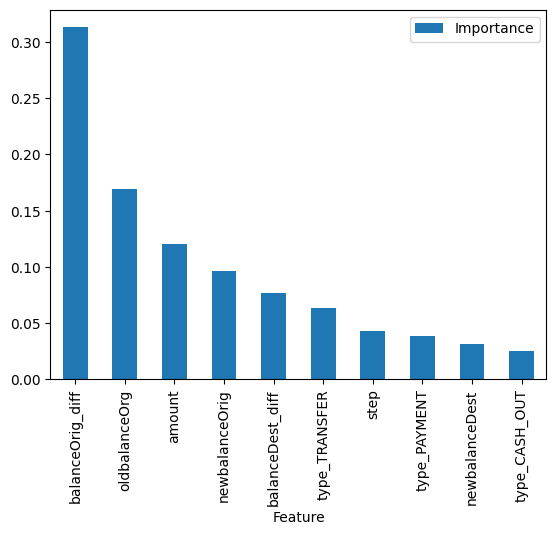

In [22]:
feature_importance.head(10).plot.bar(x='Feature', y='Importance')
